[<img src="http://www.cba.inpe.br/imagens/INPE%20BR/logo_inpe2.gif" alt="Instituto Nacionalde Pesquisas Espaciais " width="400" align="left">](http://www.inpe.br/)<br><br><br>

# <span style="color:black">Trabalho Final da Disciplina de Introdução à Programação para Sensoriamento Remoto (SER-347)</span>
<hr style="border:0.5px solid #black;">

# <span style="color:black">Análise temporal do índice de vegetação NDVI baseados nos focos de incêndio registrados no banco BDQueimadas</span>

- Ana Lígia do Nascimento Martins
- Izak Francisco Justi

## Conceituação
<p style="text-align: justify;">O Programa de Monitoramento de Queimadas foi desenvolvido e implementado pelo Instituto Nacional de Pesquisas Espaciais (INPE), possibilitando o acompanhamento de queimadas e incêndios florestais a partir de imagens de satélites, sendo assim, uma ferramenta muito importante, principalmente em regiões remotas sem meios intensivos e locais de acompanhamento, condição dominante em grande parte do país.
O sistema é capaz de gerar e disponibilizar produtos diariamente de maneira gratuita, como coordenadas geográficas de focos de incêndio, alertas por e-mail e ocorrências em áreas de interesse especial, mapas de risco de fogo, estimativas de concentração de fumaça, mapas de áreas queimadas, entre outros. Para tanto, são utilizadas imagens processadas a partir dos sensores a bordo dos satélites NOAA-15, NOAA-18, NOAA-19, METOP-B, MODIS, NPP-Suomi, GOES-13 e MSG-3. Os dados são atualizados na página do Programa sete vezes ao dia.</p>

<p style="text-align: justify;">Os dados pontuais de focos de incêndio, gerados diariamente das diversas plataformas espaciais são armazenados em um banco de dados conhecido como [BDQueimadas](http://www.inpe.br/queimadas/bdqueimadas). Esse banco de dados pode ser acessado livremente a partir do site do Programa Queimadas, permitindo acesso a dados históricos de todo o país. Os dados podem ser obtidos em formatos com extensão CSV, GeoJSON, KML ou shapefile a escolha do usuário.</p>

<p style="text-align: justify;">O estudo do comportamento e da dinâmica dos incêndios envolvem diversos fatores como a precipitação, clima, indicadores socio-econômicos, entre outros. Um dos fatores mais importantes é a vegetação, que atua como combustível nos incêndios. Portanto, é fundamental analisar seu comportamento para melhor compreensão dos eventos de queimada.</p>

<p style="text-align: justify;">Para tanto, os índices de vegetação são uma excelente ferramenta para estudos da vegetação. Eles são obtidos a partir da razão entre as refectâncias da vegetação em determindas regiões do espectro eletromagnético. Entre eles se destacam o *Normalized Vegetation Index* (NDVI) e o *Enhanced Vegetation Index* (EVI). A fórmula para obtenção desses índices são demonstradas abaixo:</p>

*Normalized Difference Vegetation Index* \begin{align*}\textrm{NDVI}=\frac{\rho_{\textrm{nir}}-\rho_{\textrm{red}}}{\rho_{\textrm{nir}}+\rho_{\textrm{red}}}\end{align*}

*Enhanced Vegetation Index* \begin{align*}\textrm{EVI}=G \cdot \frac{\rho_{\textrm{nir}}+\rho_{\textrm{red}}}{\rho_{\textrm{nir}} + C_{\textrm{1}}  \cdot \rho_{\textrm{red}} - C_{\textrm{2}} \cdot \rho_{\textrm{blue}}  + L}\end{align*}

Onde:<br>
$\rho_{red} =$ Reflectância na banda do vermelho;<br>
$\rho_{nir} =$ Reflectância na banda do infravermelho próximo;<br>
$\rho_{blue} =$ Reflectância na banda do azul;<br>
$G = 2,5$;<br>
$L = 1$;<br>
$C_1 = 6$;<br>
$C_2 = 7,5$.

<p style="text-align: justify;">A bordo do satélite Terra e Aqua, o [sensor MODIS](https://terra.nasa.gov/about/terra-instruments/modis) possui uma ampla faixa de visualização de 2.330 km de largura, e período de revisita de 1-2 dias com sensibilidade a 36 bandas espectrais discretas. Consequentemente, o MODIS rastreia uma ampla gama de sinais vitais da Terra do que qualquer outro sensor Terra.</p>

<p style="text-align: justify;">A partir dos dados oriundos desse sensor são gerados diversos produtos periodiamente para análise da superfície terrestre entre eles o NDVI e o EVI, componentes do produto [MOD13Q1](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1_v006). Esse produto fornece os índices de vegetação de toda superfície terrestre a cada 16 dias com precisão de 250 metros o qual será utilizado para o desenvolvimento desse trabalho.</p>

## Desenvolvimento
<p style="text-align: justify;">Os dados pontuais de focos de incêndio foram obtidos do banco [BDQueimadas](http://www.inpe.br/queimadas/bdqueimadas) em formato *.shp*. Os pontos de focos de incêndio obtidos através do portal compreendem todo o município analisado por um determinado período de tempo.</p>

<p style="text-align: justify;">Além disso, foi delimitado uma área de interesse para o monitoramento também em formato *.shp*.

<p style="text-align: justify;">Ambos arquivos foram importados para o ambiente Python utilizando a biblioteca [GeoPandas](http://geopandas.org/).</p>

In [1]:
import geopandas as gpd
point = gpd.GeoDataFrame.from_file('Dados\Focos.2015-01-01.2015-12-31.shp') 
poly  = gpd.GeoDataFrame.from_file('Dados\Area_Interesse.shp')


Através da ferramenta 'sjoin' disponível na biblioteca [GeoPandas](http://geopandas.org/), foi possível selecionar apenas o pontos contidos dentro da área de interesse.

In [2]:
from geopandas.tools import sjoin
pointInPolys = sjoin(point, poly, how='left')
focos = pointInPolys[pointInPolys.index_right == 0]
focos.head()

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry,index_right,id
77,2015/02/12 16:09:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0.0,0.0,-20.19133,-40.28257,None,3.8,POINT (-40.28257 -20.19133),0.0,None
80,2015/02/13 15:50:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0.0,0.0,-20.19165,-40.28241,None,2.4,POINT (-40.28241 -20.19165),0.0,None
92,2015/02/15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0.0,0.0,-20.19436,-40.28326,None,1.6,POINT (-40.28326 -20.19436),0.0,None
93,2015/02/15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0.0,0.0,-20.19012,-40.28268,None,1.6,POINT (-40.28268 -20.19012),0.0,None
96,2015/02/15 16:53:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0.0,0.0,-20.19333,-40.28279,None,5.6,POINT (-40.28279 -20.19333),0.0,None


<p style="text-align: justify;">A partir da seleção foi gerado um novo dataframe, apenas com os pontos de interesse.</p>

In [3]:
colunas = focos.columns
valores = focos.values
focos_int= gpd.GeoDataFrame(valores,columns=colunas)

In [4]:
focos_int.head()

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry,index_right,id
0,2015/02/12 16:09:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1913,-40.2826,None,3.8,POINT (-40.28257 -20.19133),0,None
1,2015/02/13 15:50:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1916,-40.2824,None,2.4,POINT (-40.28241 -20.19165),0,None
2,2015/02/15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1944,-40.2833,None,1.6,POINT (-40.28326 -20.19436),0,None
3,2015/02/15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1901,-40.2827,None,1.6,POINT (-40.28268 -20.19012),0,None
4,2015/02/15 16:53:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1933,-40.2828,None,5.6,POINT (-40.28279 -20.19333),0,None


Visualização dos dados através com o uso da biblioteca [folium](http://folium.readthedocs.io/en/latest/).

In [5]:
import folium

locations = focos_int[['Latitude', 'Longitud']]
locationlist = locations.values.tolist()

map = folium.Map(location=[poly.centroid.y[0], poly.centroid.x[0]], zoom_start=14)


folium.GeoJson(poly).add_to(map)
folium.TileLayer('Stamen Terrain').add_to(map)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=focos_int['DataHora'][point]).add_to(map)
  
map

<p style="text-align: justify;">Foram então adicionadas e calculadas as colunas de data inicial e final para obtenção da série temporal com auxílio da biblioteca [datetime](https://docs.python.org/2/library/datetime.html#), bem como renomeados os índices das colunas referentes a latitude e longitude. Dessa forma, padronizando o DataFrame segundo as exigências do pacote WTSS, que será utilizado posteriormente.</p>

<p style="text-align: justify;">Para execução da função, considerou-se 6 meses igual a 180 dias.</p>

In [6]:
import datetime as dt
import pandas as pd

focos_int["DataHora"] = pd.to_datetime(focos_int["DataHora"])
focos_int['start_date'] = ""
focos_int['end_date'] = ""
focos_int['label'] = "Área de Interesse"
focos_int.rename(columns={"Latitude": "latitude","Longitud": "longitude"}, inplace=True)

for j in range(len(focos_int)):
    focos_int['start_date'][j] = ((focos_int['DataHora'][j]) + dt.timedelta(days=-180)).strftime('%Y-%m-%d')
    focos_int['end_date'][j] = ((focos_int['DataHora'][j]) + dt.timedelta(days=180)).strftime('%Y-%m-%d')

C:\Users\izakj\Anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\izakj\Anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
focos_int.head()

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,latitude,longitude,AreaIndu,FRP,geometry,index_right,id,start_date,end_date,label
0,2015-02-12 16:09:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1913,-40.2826,None,3.8,POINT (-40.28257 -20.19133),0,None,2014-08-16,2015-08-11,Área de Interesse
1,2015-02-13 15:50:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1916,-40.2824,None,2.4,POINT (-40.28241 -20.19165),0,None,2014-08-17,2015-08-12,Área de Interesse
2,2015-02-15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1944,-40.2833,None,1.6,POINT (-40.28326 -20.19436),0,None,2014-08-19,2015-08-14,Área de Interesse
3,2015-02-15 04:23:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1901,-40.2827,None,1.6,POINT (-40.28268 -20.19012),0,None,2014-08-19,2015-08-14,Área de Interesse
4,2015-02-15 16:53:00,NPP_375,Brasil,Espirito Santo,Serra,Mata Atlantica,0,0,0,-20.1933,-40.2828,None,5.6,POINT (-40.28279 -20.19333),0,None,2014-08-19,2015-08-14,Área de Interesse


<p style="text-align: justify;">O [WTSS](https://github.com/e-sensing/wtss.py) é um serviço da Web leve para manipular imagens de sensoriamento remoto como séries temporais. Dado um local e um intervalo de tempo, pode-se recuperar as séries temporais correspondentes como uma lista Python de valores reais.</p>

<p style="text-align: justify;">Vale ressaltar que o servidor conta com a coleção de imagens *MOD13Q1* do sensor MODIS. O catálogo conta com imagens datadas entre 18/02/2000 a 18/02/2017. </p>

<p style="text-align: justify;">Primeiramente, é necessário conectar ao servidor de imagens. </p>

In [9]:
from wtss import wtss

w = wtss("http://www.dpi.inpe.br/tws")


cv_scheme = w.describe_coverage("mod13q1_512")

print ("ARRAY: {}".format(cv_scheme["name"]) + ". " \
       + str (cv_scheme['description']) + " - " + str(cv_scheme['detail']))

print ("\nTIMELINE:\n{}...{}".format(cv_scheme['timeline'][0:3], \
                                     cv_scheme['timeline'][-3:]))
print ("\nATRIBUTOS:")
for el in cv_scheme['attributes']:
    att = cv_scheme['attributes'][el]
    print (el + ": " + att['description'] + ". Type: " + att['datatype'] + \
           ".Scale factor:" + str(att['scale_factor']))

ARRAY: mod13q1_512. Vegetation Indices 16-Day L3 Global 250m - https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1

TIMELINE:
['2000-02-18', '2000-03-05', '2000-03-21']...['2017-01-17', '2017-02-02', '2017-02-18']

ATRIBUTOS:
ndvi: 250m 16 days NDVI. Type: int16.Scale factor:0.0001
evi: 250m 16 days EVI. Type: int16.Scale factor:0.0001
red: 250m 16 days red reflectance (Band 1). Type: int16.Scale factor:0.0001
nir: 250m 16 days NIR reflectance (Band 2). Type: int16.Scale factor:0.0001
blue: 250m 16 days blue reflectance (Band 3). Type: int16.Scale factor:0.0001
mir: 250m 16 days MIR reflectance (Band 7). Type: int16.Scale factor:0.0001


<p style="text-align: justify;">Então, foram utilizadas funções para gerar as séries temporais (wtss_get_time_series), e gerar o gráfico de variação dos índices de vegetação (plot_time_series). </p>

<p style="text-align: justify;">Essas funções possuem código aberto e foram obtidas no seguinte endereço: </p>
- https://github.com/e-sensing/wgiss-py-webinar/blob/master/tools.py


In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from wtss import wtss
import json
import scipy
import scipy.sparse.linalg

def wtss_get_time_series(samples):
    
    # get wtss object
    w = wtss("http://www.dpi.inpe.br/tws")
    # get time series for each sample
    # create an empty data frame to store all time series
    data = pd.DataFrame()
    # traverse points, get data from wtss server and stores it
    for i in range(len(samples)):
        # request wtss
        ts = w.time_series("mod13q1_512", ("ndvi", "evi"), 
                           latitude=samples["latitude"][i], 
                           longitude=samples["longitude"][i], 
                           start_date=samples["start_date"][i],
                           end_date=samples["end_date"][i])
        # concatenate samples' time series
        data = pd.concat([data, 
                                pd.DataFrame({"id": i, 
                                              "label": samples["label"][i],
                                              "start_date": samples["start_date"][i],
                                              "latitude": samples["latitude"][i], 
                                              "longitude": samples["longitude"][i], 
                                              "timeline": pd.to_datetime(ts.timeline), 
                                              "ndvi": ts["ndvi"], 
                                              "evi": ts["evi"]},
                                             columns=["id", "label", "start_date", "latitude", "longitude", 
                                                      "timeline", "ndvi", "evi"])])
    return data


def plot_time_series_ndvi(data, w = 15, h = 5):
    
    # get colors according to label
    labels, index_labels = np.unique(data.groupby("id").agg({"label": "first"})["label"], 
                                     return_inverse=True)
    colors = plt.cm.jet(plt.Normalize()(np.arange(len(labels))))
    
    # plot time series
    matplotlib.style.use("ggplot")
    fig, ax = plt.subplots(1, figsize = (w, h))
    fig.subplots_adjust(bottom=0.2)

    # multiline plot with group by time serie id
    # compute days after the time series start date as x axis values
    for i, (key, grp) in enumerate(data.groupby(["id"])): 
        ax.plot((grp["timeline"] - pd.to_datetime(grp["start_date"])) / pd.Timedelta('1 days'), 
                grp["ndvi"], color=colors[index_labels][i])


    # plot axis labels 
    plt.xlabel("days after time series start date")
    plt.ylabel("ndvi")

    plt.show()
    
def plot_time_series_evi(data, w = 15, h = 5):
    
    # get colors according to label
    labels, index_labels = np.unique(data.groupby("id").agg({"label": "first"})["label"], 
                                     return_inverse=True)
    colors = plt.cm.jet(plt.Normalize()(np.arange(len(labels))))
    
    # plot time series
    matplotlib.style.use("ggplot")
    fig, ax = plt.subplots(1, figsize = (w, h))
    fig.subplots_adjust(bottom=0.2)

    # multiline plot with group by time serie id
    # compute days after the time series start date as x axis values
    for i, (key, grp) in enumerate(data.groupby(["id"])): 
        ax.plot((grp["timeline"] - pd.to_datetime(grp["start_date"])) / pd.Timedelta('1 days'), 
                grp["evi"], color=colors[index_labels][i])


    # plot axis labels 
    plt.xlabel("days after time series start date")
    plt.ylabel("evi")

    plt.show()


Aplica-se então a função *wtss_get_time_series* para obter a série temporal de todos os pontos do DataFrame.

In [11]:
samples_ts = wtss_get_time_series(focos_int)

In [12]:
samples_ts.head()

,id,label,start_date,latitude,longitude,timeline,ndvi,evi
0,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-08-29,7829.0,3953.0
1,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-09-14,7097.0,3582.0
2,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-09-30,6949.0,4978.0
3,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-10-16,7748.0,5441.0
4,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-11-01,7593.0,4965.0


Reescalando os valores de NDVI e EVI da série temporal.

In [13]:
samples_ts['ndvi'] *= cv_scheme['attributes']['ndvi']['scale_factor']
samples_ts['evi'] *= cv_scheme['attributes']['evi']['scale_factor']

In [14]:
samples_ts.head()

,id,label,start_date,latitude,longitude,timeline,ndvi,evi
0,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-08-29,0.7829,0.3953
1,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-09-14,0.7097,0.3582
2,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-09-30,0.6949,0.4978
3,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-10-16,0.7748,0.5441
4,0,Área de Interesse,2014-08-16,-20.19133,-40.28257,2014-11-01,0.7593,0.4965


Plotando o gráfico com a séries temporais do NDVI.

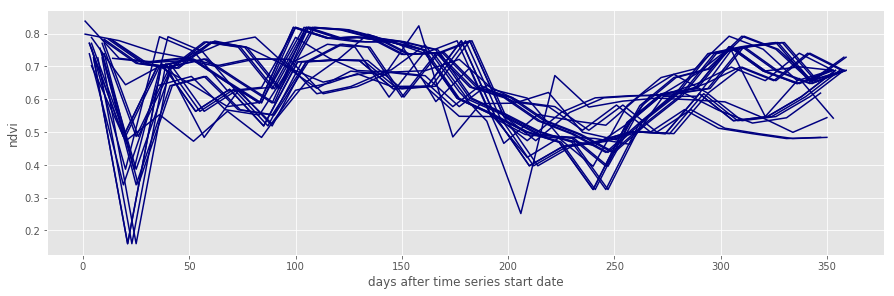

In [15]:
plot_time_series_ndvi(samples_ts)

Plotando o gráfico com a séries temporais do EVI.

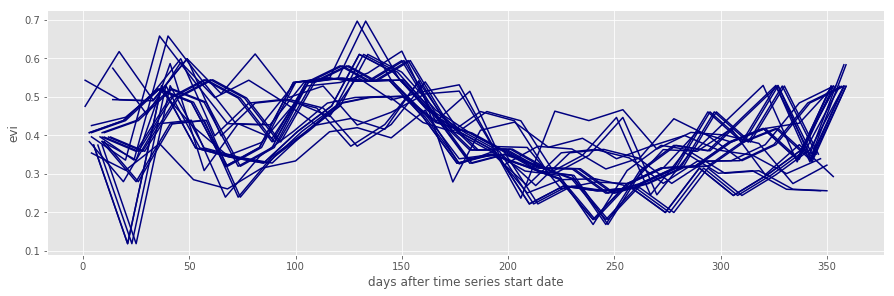

In [16]:
plot_time_series_evi(samples_ts)

## Primeira Análise

Ordenando os valores de NDVI e EVI segundo as datas dos produtos MODIS da série temporal.

In [17]:
ndvi=samples_ts.groupby('timeline')['ndvi'].apply(list)
evi=samples_ts.groupby('timeline')['evi'].apply(list)

In [18]:
ndvi[:5]

timeline
2014-08-29    [0.7829, 0.7829, 0.7387, 0.7829, 0.7707, 0.770...
2014-09-14    [0.7097, 0.7097, 0.3392, 0.7097, 0.4867, 0.486...
2014-09-30    [0.6949000000000001, 0.6949000000000001, 0.641...
2014-10-16    [0.7748, 0.7748, 0.6697000000000001, 0.7748, 0...
2014-11-01    [0.7593000000000001, 0.7593000000000001, 0.568...
Name: ndvi, dtype: object

In [19]:
evi[:5]

timeline
2014-08-29    [0.39530000000000004, 0.39530000000000004, 0.3...
2014-09-14    [0.3582, 0.3582, 0.27940000000000004, 0.3582, ...
2014-09-30    [0.4978, 0.4978, 0.4295, 0.4978, 0.5202, 0.520...
2014-10-16    [0.5441, 0.5441, 0.4388, 0.5441, 0.48560000000...
2014-11-01    [0.4965, 0.4965, 0.23920000000000002, 0.4965, ...
Name: evi, dtype: object

Obtendo as datas da série.

In [20]:
datas = []
for m in range(len(ndvi.index)):
    datas.append((ndvi.index[m]).strftime('%d/%m/%Y'))

In [21]:
datas[:5]

['29/08/2014', '14/09/2014', '30/09/2014', '16/10/2014', '01/11/2014']

Plotando gráfico estatístico de NDVI.

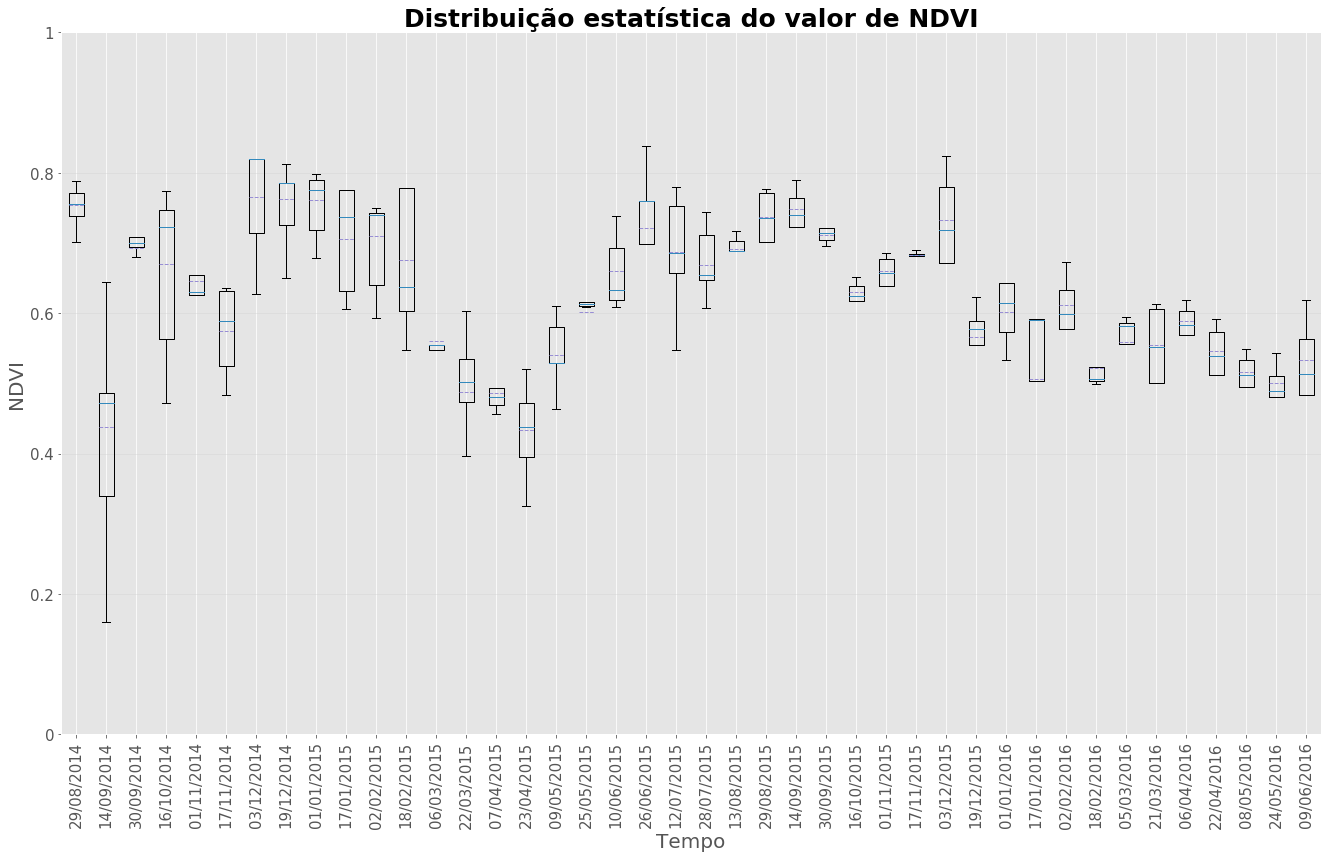

In [22]:
fig, ax1 = plt.subplots(figsize=(20, 15))
fig.canvas.set_window_title('Distribuicao estatistica NDVI')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(ndvi, notch=False, sym='+', vert=True, whis=1.5, meanline=True, showmeans=True, showfliers=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Distribuição estatística do valor de NDVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Tempo', fontdict={'size': 20})
ax1.set_ylabel('NDVI', fontdict={'size': 20})

          
top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(datas, rotation=90, fontsize=15)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)

plt.show()

Plotando gráfico estatístico de EVI.

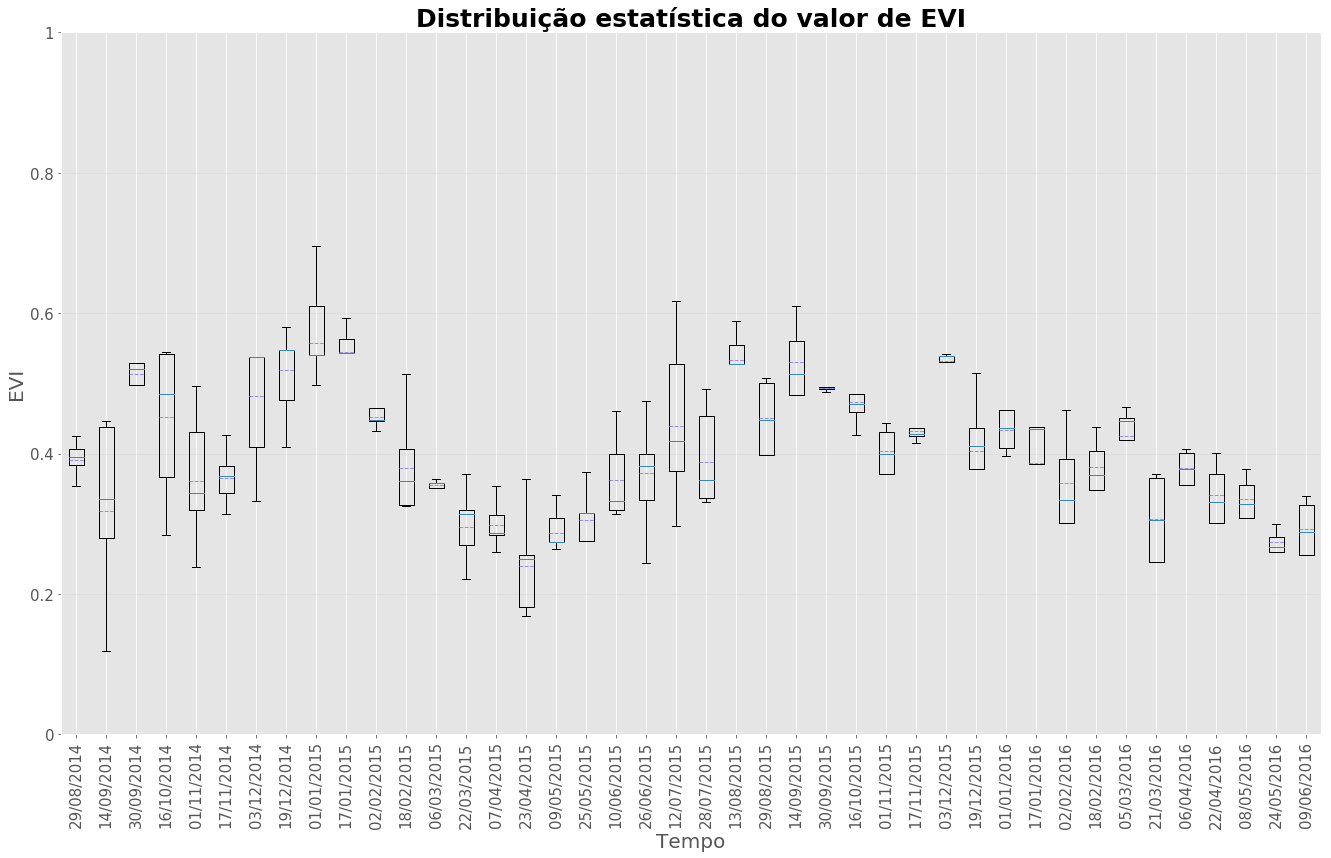

In [23]:
fig, ax1 = plt.subplots(sharey=True,figsize=(20, 15))
fig.canvas.set_window_title('Distribuicao estatistica EVI')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(evi, notch=False, sym='+', vert=True, whis=1.5, meanline=True, showmeans=True, showfliers=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Distribuição estatística do valor de EVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Tempo', fontdict={'size': 20})
ax1.set_ylabel('EVI', fontdict={'size': 20})

          
top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(datas, rotation=90, fontsize=15)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)

plt.show()

Plotando o gráfico comparativo entre ambos índices.

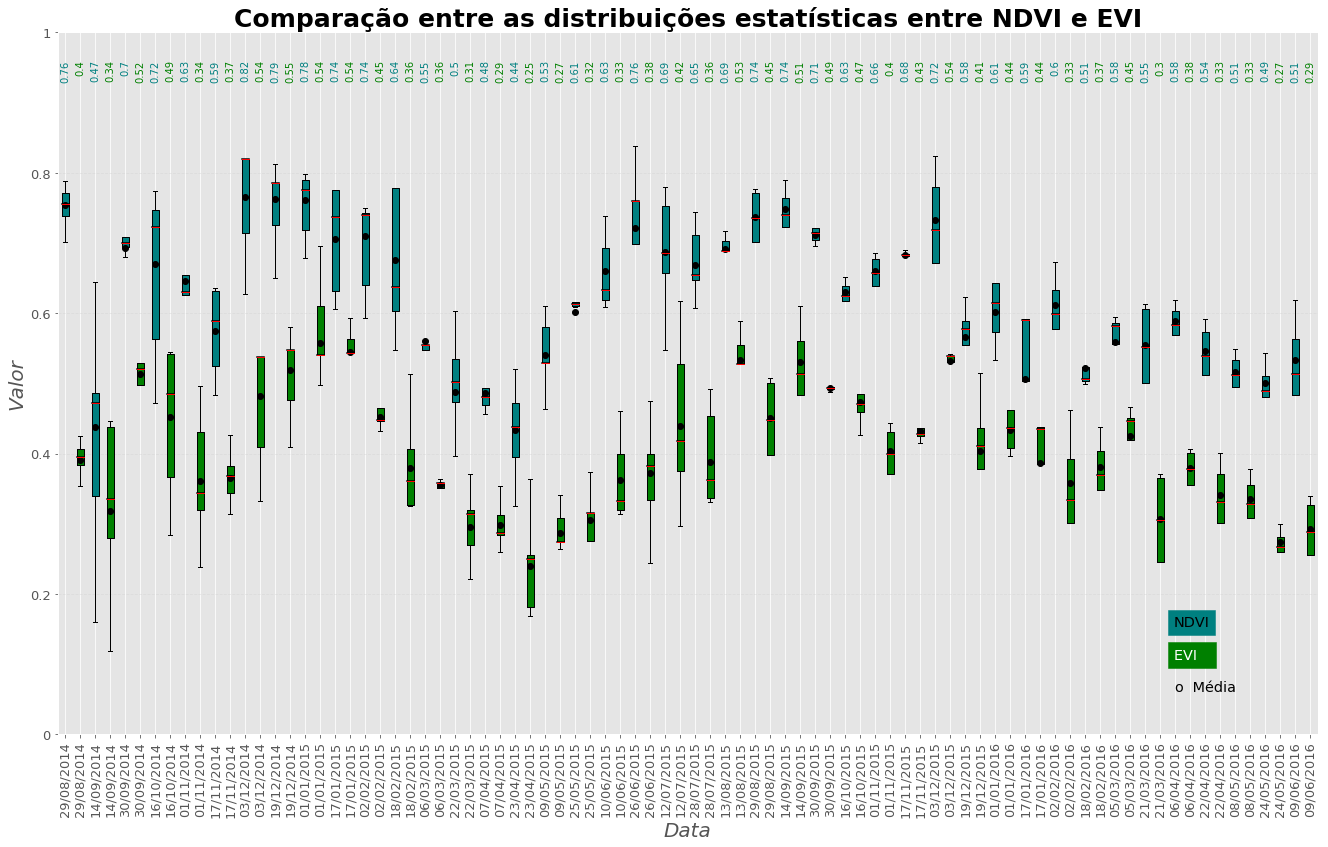

In [25]:
from matplotlib.patches import Polygon

numDists = len(datas)
randomDists = datas
data = []

for l in range(len(datas)):
    data.append(np.array(ndvi[l]))
    data.append(np.array(evi[l]))


fig, ax1 = plt.subplots(figsize=(20,15))

fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5, showfliers=False)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['medians'], color='red',linestyle='-')

ax1.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',
               alpha=0.5)


ax1.set_axisbelow(True)
ax1.set_title('Comparação entre as distribuições estatísticas entre NDVI e EVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Data', fontdict={'size': 20,'weight': 'normal', 'style':'italic'})
ax1.set_ylabel('Valor', fontdict={'size': 20,'weight': 'normal', 'style':'italic'})


boxColors = ['teal', 'green']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = np.column_stack([boxX, boxY])
    
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    ax1.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='black', marker='o', markeredgecolor='k')

top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(randomDists, 2),
                    rotation=90, fontsize=13)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=13)

pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', weight='normal',
             color=boxColors[k],
                    rotation=90)

fig.text(0.85, 0.35, 'NDVI',
         backgroundcolor=boxColors[0], color='black', weight='roman',
         size='x-large')
fig.text(0.85, 0.32, 'EVI   ',
         backgroundcolor=boxColors[1],
         color='white', weight='roman', size='x-large')
fig.text(0.85, 0.29, 'o', color='black',
         weight='roman', size='x-large')
fig.text(0.86, 0.29, ' Média', color='black', weight='roman',
         size='x-large')

plt.show()


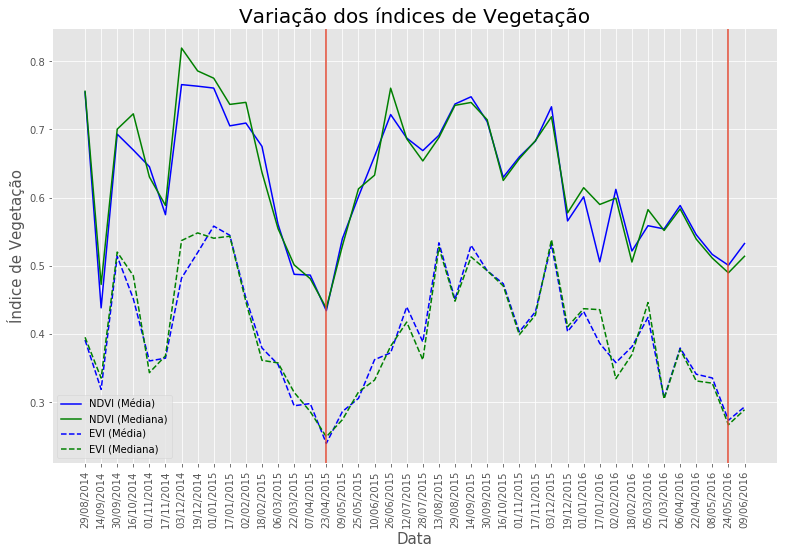

In [30]:
pvt = pd.pivot_table(samples_ts, values=["ndvi","evi"], index=["timeline"],
                    aggfunc={"ndvi":[np.mean, np.median, np.std, np.min, np.max],
                             "evi":[np.mean, np.median, np.std, np.min, np.max]})
data_str = []
for y in range(len(ndvi.index)):
    data_str.append((pvt.index[y]).strftime('%d/%m/%Y'))
    
plt.figure(figsize=(13,8))
                      
plt.plot(data_str,pvt["ndvi"]["mean"],label="NDVI (Média)", color='b')
plt.plot(data_str,pvt["ndvi"]["median"],label="NDVI (Mediana)", color='g')
plt.plot(data_str,pvt["evi"]["mean"],label="EVI (Média)", color='b',linestyle="--")
plt.plot(data_str,pvt["evi"]["median"],label="EVI (Mediana)", color='g',linestyle="--")

plt.axvline(x='23/04/2015')
plt.axvline(x='24/05/2016')

plt.xlabel("Data", fontsize=15)
plt.ylabel("Índice de Vegetação", fontsize=15)

plt.title("Variação dos índices de Vegetação", fontsize=20)

plt.xticks(rotation=90, fontsize=10)

plt.legend(loc=3, prop={'size':10});

[Exemplo 1 - Abril/2015](http://g1.globo.com/espirito-santo/noticia/2015/04/incendio-em-turfa-na-serra-es-ja-dura-quase-dois-meses.html)

[Exemplo 2 - Abril/2016](http://g1.globo.com/espirito-santo/noticia/2016/04/fumaca-de-turfa-causa-problemas-de-saude-em-moradores-da-serra-es.html)

## Segunda Análise

Conversão do Dataframe para array, estrutura da biblioteca [NumPy](https://docs.scipy.org/doc/numpy/dev/)

In [31]:
focosnp = focos_int.as_matrix()

In [32]:
focosnp[:5]

array([[Timestamp('2015-02-12 16:09:00'), 'NPP_375', 'Brasil',
        'Espirito Santo', 'Serra', 'Mata Atlantica', 0, 0.0, 0.0,
        -20.19133, -40.28257, None, 3.8,
        <shapely.geometry.point.Point object at 0x0000015C49A0DB00>, 0.0,
        None, '2014-08-16', '2015-08-11', 'Área de Interesse'],
       [Timestamp('2015-02-13 15:50:00'), 'NPP_375', 'Brasil',
        'Espirito Santo', 'Serra', 'Mata Atlantica', 0, 0.0, 0.0,
        -20.19165, -40.28241, None, 2.4,
        <shapely.geometry.point.Point object at 0x0000015C49A10080>, 0.0,
        None, '2014-08-17', '2015-08-12', 'Área de Interesse'],
       [Timestamp('2015-02-15 04:23:00'), 'NPP_375', 'Brasil',
        'Espirito Santo', 'Serra', 'Mata Atlantica', 0, 0.0, 0.0,
        -20.19436, -40.28326, None, 1.6,
        <shapely.geometry.point.Point object at 0x0000015C49A13518>, 0.0,
        None, '2014-08-19', '2015-08-14', 'Área de Interesse'],
       [Timestamp('2015-02-15 04:23:00'), 'NPP_375', 'Brasil',
        'Espi

Obtenção dos valores de NDVI e EVI das séries temporais.

In [33]:
import numpy as np
from wtss import wtss
import datetime as dt

w = wtss("http://www.dpi.inpe.br/tws")

latitude = []
longitude = []
data = []
timeline = []

ts_ap = []

for x in range(len(focosnp)):
        
    latitude.append(focosnp[x][9])
    longitude.append(focosnp[x][10]) 
    data.append(focosnp[x][0])
    

for y in range(len(latitude)):
         
    dt_start = (data[y] + dt.timedelta(days=-180)).strftime('%Y-%m-%d')
    dt_end = (data[y] + dt.timedelta(days=180)).strftime('%Y-%m-%d')
        
    ts = w.time_series("mod13q1_512", ("ndvi", "evi"), latitude[y], longitude[y],  start_date=dt_start, end_date=dt_end)
    ts_ap.append(ts)
             
    timeline.append(ts.timeline)

Criação de Dataframes vazios para associar os valores de NDVI e EVI com ferramentas da biblioteca [Pandas](https://pandas.pydata.org/pandas-docs/stable/).

In [34]:
import pandas as pd

val_NDVI = pd.DataFrame()
val_EVI = pd.DataFrame()

Organização dos valores dos índices de vegetação das séries temporais nos DataFrames anteriores

In [35]:
for i in range(len(ts_ap)):
    val_NDVI['NDVI {}'.format(i)] = pd.Series(ts_ap[i]['ndvi'])
    
for j in range(len(ts_ap)):
    val_EVI['EVI {}'.format(j)] = pd.Series(ts_ap[j]['evi'])

In [36]:
val_NDVI.head()

,NDVI 0,NDVI 1,NDVI 2,NDVI 3,NDVI 4,NDVI 5,NDVI 6,NDVI 7,NDVI 8,NDVI 9,...,NDVI 15,NDVI 16,NDVI 17,NDVI 18,NDVI 19,NDVI 20,NDVI 21,NDVI 22,NDVI 23,NDVI 24
0,7829.0,7829.0,7387.0,7829.0,7707.0,7707.0,7387.0,7396.0,7829.0,7262.0,...,7884.0,7559.0,7707.0,7707.0,7387.0,7707.0,8383.0,7986.0,7249.0,7797.0
1,7097.0,7097.0,3392.0,7097.0,4867.0,4867.0,3392.0,3868.0,7097.0,1598.0,...,6443.0,3868.0,4867.0,4867.0,3392.0,4867.0,7249.0,7787.0,7137.0,7110.0
2,6949.0,6949.0,6415.0,6949.0,7004.0,7004.0,6415.0,6805.0,6949.0,7082.0,...,7004.0,7908.0,7004.0,7004.0,6415.0,7004.0,7137.0,7449.0,7255.0,7175.0
3,7748.0,7748.0,6697.0,7748.0,7229.0,7229.0,6697.0,4839.0,7748.0,5633.0,...,6415.0,7466.0,7229.0,7229.0,6697.0,7229.0,7255.0,7255.0,7009.0,7776.0
4,7593.0,7593.0,5682.0,7593.0,6545.0,6545.0,5682.0,6255.0,7593.0,6304.0,...,5779.0,6255.0,6545.0,6545.0,5682.0,6545.0,7009.0,7697.0,7226.0,7565.0


Escalando os valores dos índices

In [37]:
esc_NDVI = val_NDVI*cv_scheme['attributes']['ndvi']['scale_factor']
esc_NDVI.head()

,NDVI 0,NDVI 1,NDVI 2,NDVI 3,NDVI 4,NDVI 5,NDVI 6,NDVI 7,NDVI 8,NDVI 9,...,NDVI 15,NDVI 16,NDVI 17,NDVI 18,NDVI 19,NDVI 20,NDVI 21,NDVI 22,NDVI 23,NDVI 24
0,0.7829,0.7829,0.7387,0.7829,0.7707,0.7707,0.7387,0.7396,0.7829,0.7262,...,0.7884,0.7559,0.7707,0.7707,0.7387,0.7707,0.8383,0.7986,0.7249,0.7797
1,0.7097,0.7097,0.3392,0.7097,0.4867,0.4867,0.3392,0.3868,0.7097,0.1598,...,0.6443,0.3868,0.4867,0.4867,0.3392,0.4867,0.7249,0.7787,0.7137,0.7110
2,0.6949,0.6949,0.6415,0.6949,0.7004,0.7004,0.6415,0.6805,0.6949,0.7082,...,0.7004,0.7908,0.7004,0.7004,0.6415,0.7004,0.7137,0.7449,0.7255,0.7175
3,0.7748,0.7748,0.6697,0.7748,0.7229,0.7229,0.6697,0.4839,0.7748,0.5633,...,0.6415,0.7466,0.7229,0.7229,0.6697,0.7229,0.7255,0.7255,0.7009,0.7776
4,0.7593,0.7593,0.5682,0.7593,0.6545,0.6545,0.5682,0.6255,0.7593,0.6304,...,0.5779,0.6255,0.6545,0.6545,0.5682,0.6545,0.7009,0.7697,0.7226,0.7565


In [38]:
esc_EVI = val_EVI*cv_scheme['attributes']['evi']['scale_factor']
esc_EVI.head()

,EVI 0,EVI 1,EVI 2,EVI 3,EVI 4,EVI 5,EVI 6,EVI 7,EVI 8,EVI 9,...,EVI 15,EVI 16,EVI 17,EVI 18,EVI 19,EVI 20,EVI 21,EVI 22,EVI 23,EVI 24
0,0.3953,0.3953,0.3833,0.3953,0.4067,0.4067,0.3833,0.3840,0.3953,0.3744,...,0.4251,0.3958,0.4067,0.4067,0.3833,0.4067,0.5428,0.4751,0.4925,0.5741
1,0.3582,0.3582,0.2794,0.3582,0.4380,0.4380,0.2794,0.3354,0.3582,0.1184,...,0.4466,0.3354,0.4380,0.4380,0.2794,0.4380,0.4925,0.6172,0.4894,0.4543
2,0.4978,0.4978,0.4295,0.4978,0.5202,0.5202,0.4295,0.5860,0.4978,0.5287,...,0.5202,0.6576,0.5202,0.5202,0.4295,0.5202,0.4894,0.4914,0.5986,0.5892
3,0.5441,0.5441,0.4388,0.5441,0.4856,0.4856,0.4388,0.3083,0.5441,0.3670,...,0.4215,0.5425,0.4856,0.4856,0.4388,0.4856,0.5986,0.5986,0.3987,0.4976
4,0.4965,0.4965,0.2392,0.4965,0.3194,0.3194,0.2392,0.4301,0.4965,0.3434,...,0.3469,0.4301,0.3194,0.3194,0.2392,0.3194,0.3987,0.5080,0.4834,0.5429


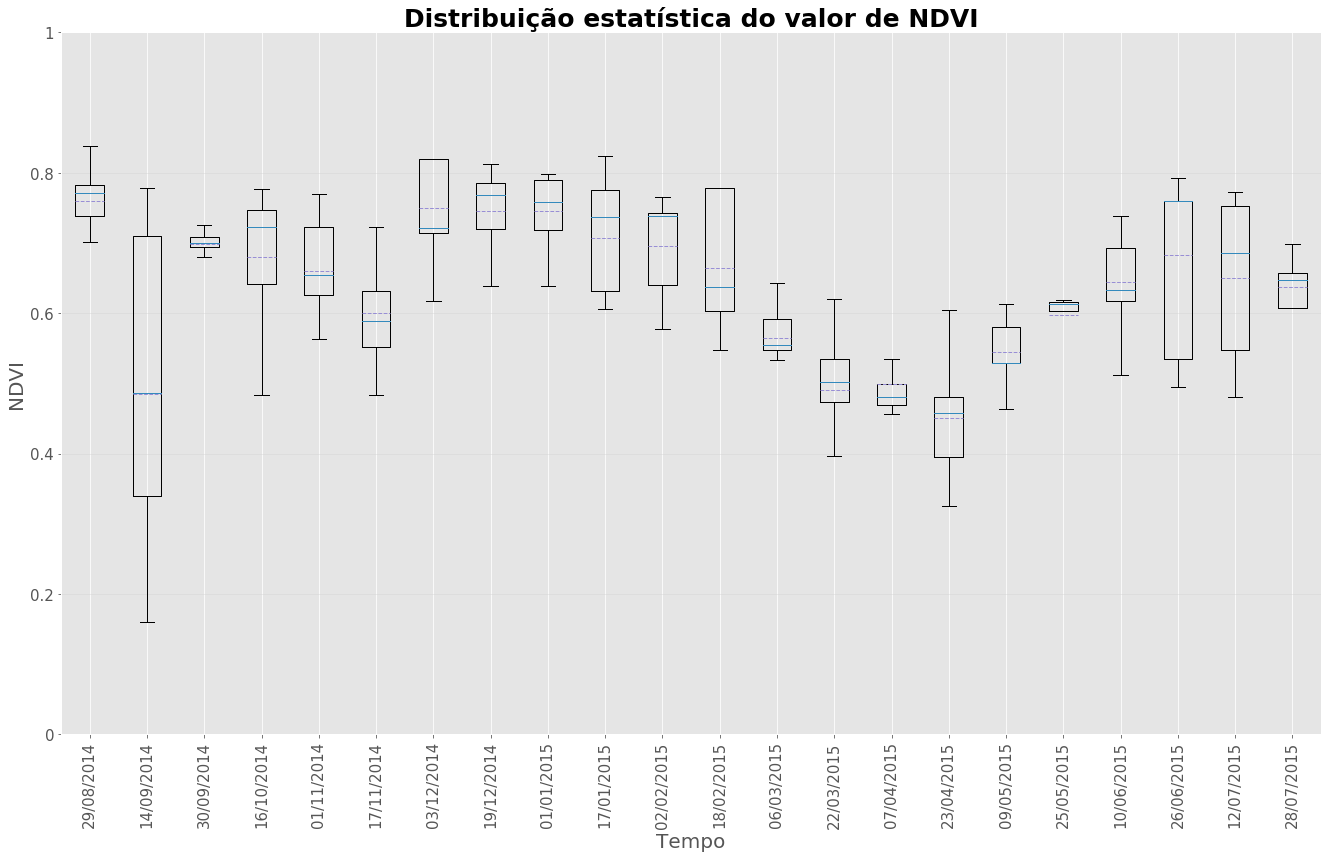

In [40]:
trans_NDVI = esc_NDVI.transpose()

ndvi = []

for l in range(len(esc_NDVI)):
    ndvi.append(np.array(trans_NDVI[l]))

fig, ax1 = plt.subplots(figsize=(20, 15))
fig.canvas.set_window_title('Distribuicao estatistica NDVI')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(ndvi, notch=False, sym='+', vert=True, whis=1.5, meanline=True, showmeans=True, showfliers=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Distribuição estatística do valor de NDVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Tempo', fontdict={'size': 20})
ax1.set_ylabel('NDVI', fontdict={'size': 20})

          
top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(datas, rotation=90, fontsize=15)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)

plt.show()

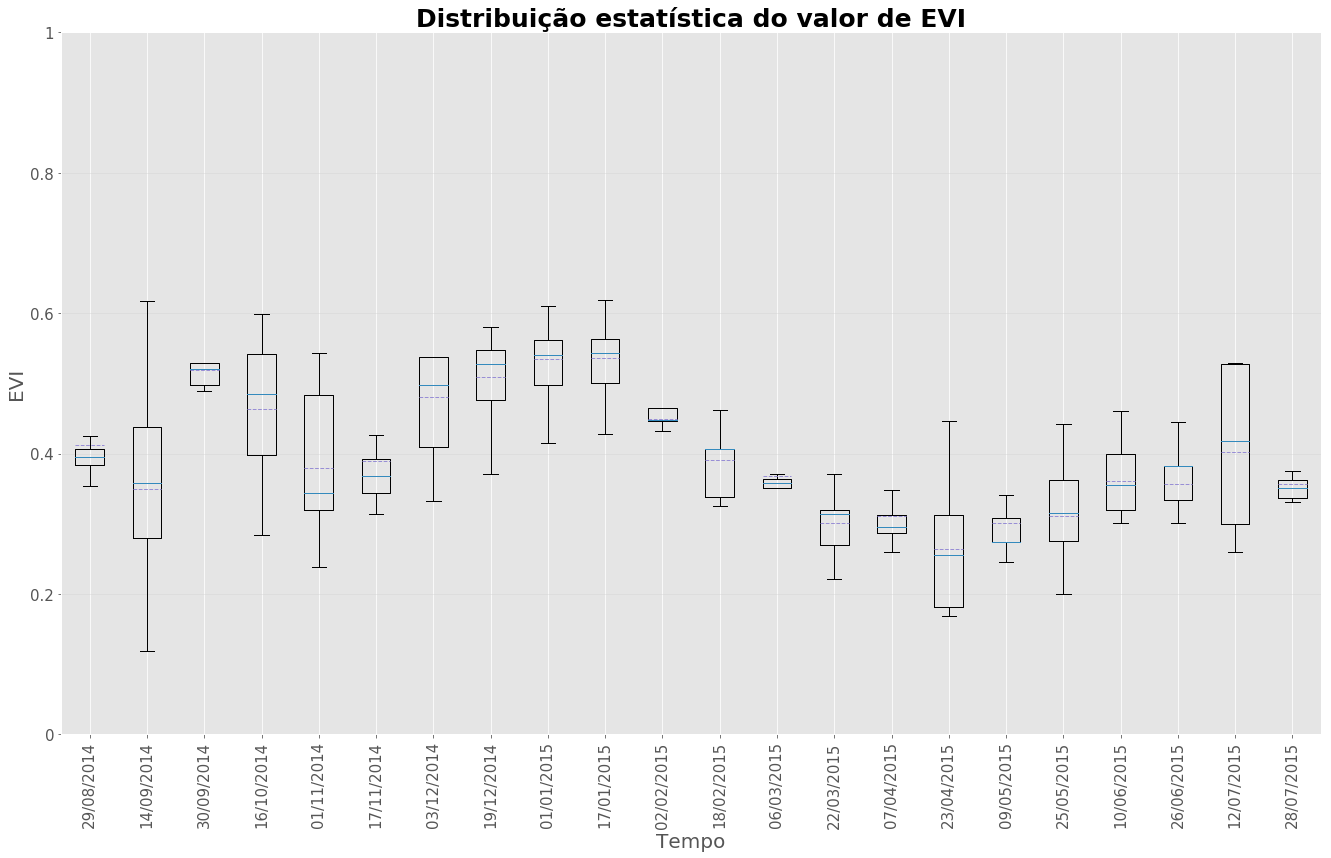

In [41]:
trans_EVI = esc_EVI.transpose()

evi = []

for l in range(len(esc_EVI)):
    evi.append(np.array(trans_EVI[l]))

fig, ax1 = plt.subplots(sharey=True,figsize=(20, 15))
fig.canvas.set_window_title('Distribuicao estatistica EVI')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(evi, notch=False, sym='+', vert=True, whis=1.5, meanline=True, showmeans=True, showfliers=False)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Distribuição estatística do valor de EVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Tempo', fontdict={'size': 20})
ax1.set_ylabel('EVI', fontdict={'size': 20})

          
top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(datas, rotation=90, fontsize=15)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=15)

plt.show()

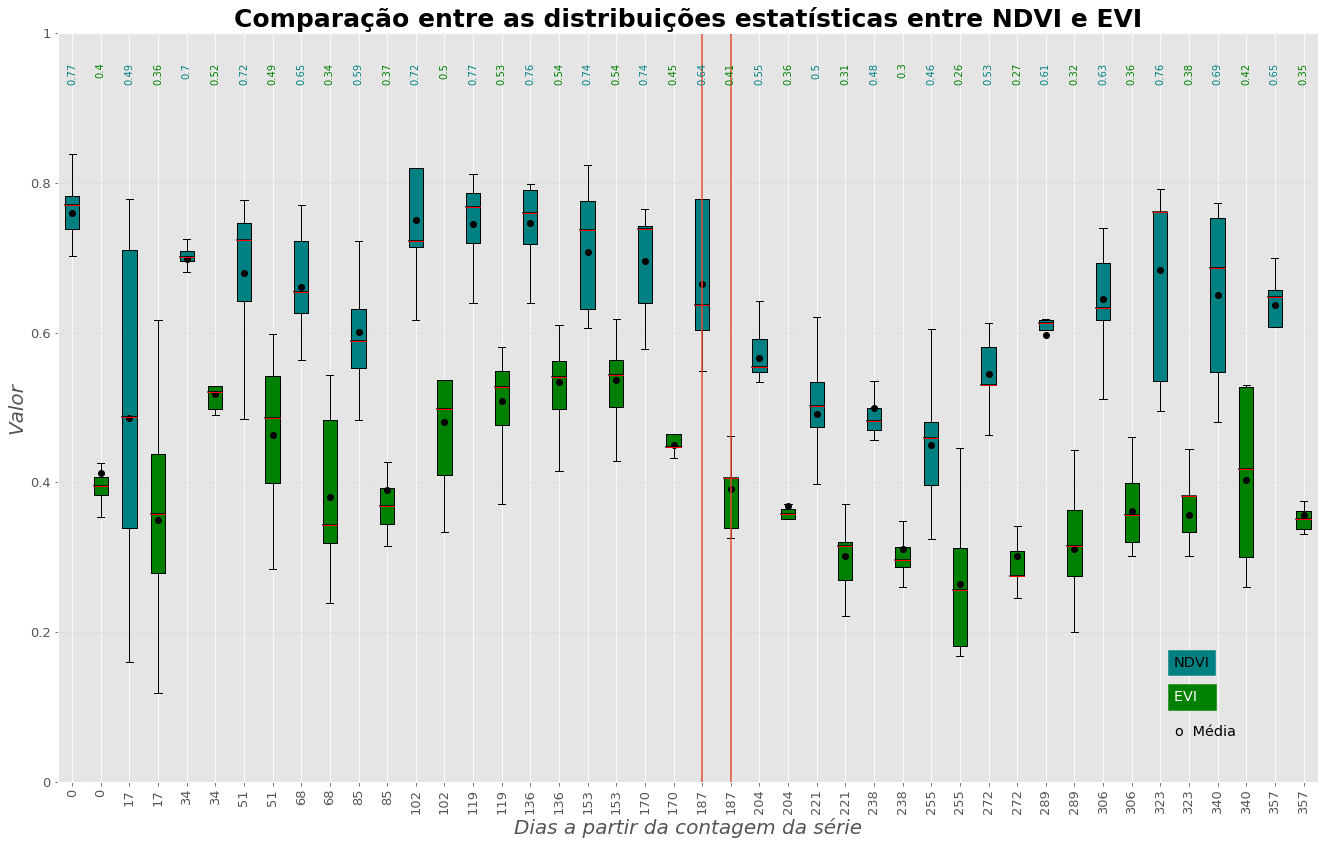

In [42]:
from matplotlib.patches import Polygon

randomDists=range(0,360,17)

trans_NDVI = esc_NDVI.transpose()
trans_EVI = esc_EVI.transpose()

numDists = len(esc_NDVI)
data = []

for l in range(len(esc_NDVI)):
    data.append(np.array(trans_NDVI[l]))
    data.append(np.array(trans_EVI[l]))


fig, ax1 = plt.subplots(figsize=(20,16))

fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5, showfliers=False)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['medians'], color='red',linestyle='-')

ax1.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',
               alpha=0.5)


ax1.set_axisbelow(True)
ax1.set_title('Comparação entre as distribuições estatísticas entre NDVI e EVI', fontdict={'size': 25,'weight': 'bold'})
ax1.set_xlabel('Dias a partir da contagem da série', fontdict={'size': 20,'weight': 'normal', 'style':'italic'})
ax1.set_ylabel('Valor', fontdict={'size': 20,'weight': 'normal', 'style':'italic'})


boxColors = ['teal', 'green']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = np.column_stack([boxX, boxY])
    
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    ax1.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='black', marker='o', markeredgecolor='k')

top = 1
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(randomDists, 2),
                   rotation=90, fontsize=13)
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize=13)

ax1.axvline(x=23)
ax1.axvline(x=24)

pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', weight='normal',
             color=boxColors[k],
                    rotation=90)

fig.text(0.85, 0.35, 'NDVI',
         backgroundcolor=boxColors[0], color='black', weight='roman',
         size='x-large')
fig.text(0.85, 0.32, 'EVI   ',
         backgroundcolor=boxColors[1],
         color='white', weight='roman', size='x-large')
fig.text(0.85, 0.29, 'o', color='black',
         weight='roman', size='x-large')
fig.text(0.86, 0.29, ' Média', color='black', weight='roman',
         size='x-large')

plt.show()

In [43]:
iv_sts = pd.DataFrame({"ndvi_mean": esc_NDVI.mean(axis=1), 
                       "ndvi_median": esc_NDVI.median(axis=1),
                       "ndvi_std": esc_NDVI.std(axis=1),
                       "evi_mean": esc_EVI.mean(axis=1), 
                       "evi_median": esc_EVI.median(axis=1),
                       "evi_std": esc_EVI.std(axis=1)},
                      columns=["ndvi_mean","ndvi_median","ndvi_std",
                               "evi_mean","evi_median","evi_std"])

In [44]:
iv_sts.head()

,ndvi_mean,ndvi_median,ndvi_std,evi_mean,evi_median,evi_std
0,0.759576,0.7707,0.030582,0.412048,0.3953,0.053267
1,0.485392,0.4867,0.203143,0.349996,0.3582,0.129446
2,0.698248,0.7004,0.046612,0.518548,0.5202,0.065142
3,0.679852,0.7229,0.092654,0.463268,0.4856,0.086533
4,0.660136,0.6545,0.069210,0.380200,0.3434,0.094500


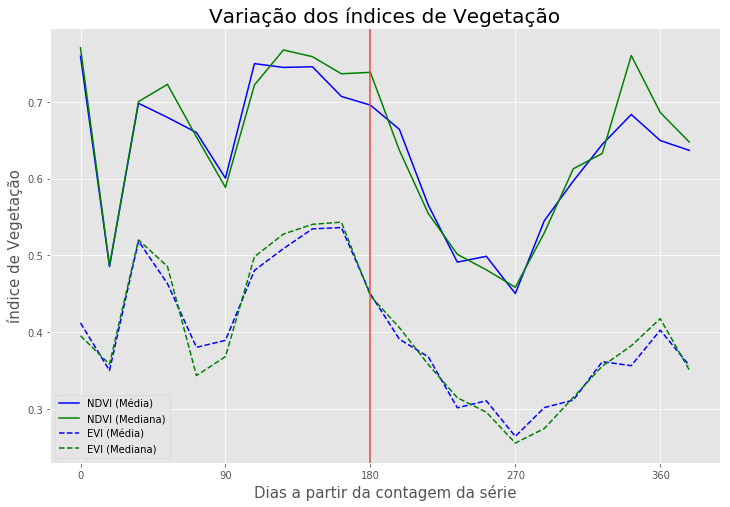

In [45]:
plt.figure( figsize=(12,8) )
                      
plt.plot(iv_sts['ndvi_mean'],label="NDVI (Média)", color='b')
plt.plot(iv_sts['ndvi_median'],label="NDVI (Mediana)", color = 'g')
plt.plot(iv_sts['evi_mean'],label="EVI (Média)",linestyle="--", color='b')
plt.plot(iv_sts['evi_median'],label="EVI (Mediana)",linestyle="--", color='g')

plt.axvline(x=10)

plt.xticks([0,5,10,15,20],["0","90","180","270","360"])
plt.xlabel("Dias a partir da contagem da série", fontsize=15)
plt.ylabel("índice de Vegetação", fontsize=15)

plt.title("Variação dos índices de Vegetação", fontsize=20)


plt.legend(loc='best');